In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import numpy as np

In [3]:
df = pd.read_csv("reduced_health_Survey_GW.csv")
# Rename diseases and healthy behaviors
df.rename(columns = {
    "heal26": "diabetes",
    "heal27a": "hi_BP",
    "heal27b": "hi_chol",
    "heal27c": "lung_prob",
    "heal27d": "ment_health",
    "heal27e": "heart_disease",
    "heal27f": "cancer"
}, inplace = True)
df["healask"].replace({"Black non-hispanic": "Black non-Hispanic",
                     "White non-hispanic": "White non-Hispanic"}, inplace = True)

In [4]:
# Race ns
race = df["healask"].value_counts().to_frame()
races = ["Hispanic", "Black non-Hispanic", "White non-Hispanic"]
race

,healask
Hispanic,300
Black non-Hispanic,286
White non-Hispanic,260


In [5]:
# BMI missing value = 99
df["bmi"].replace(99.9, np.NaN, inplace = True)
# Yes/no obese
conditions = [(df["bmi"]) >= 30, (df["bmi"] < 30)]
df["obese"] = np.select(conditions, [1,0])

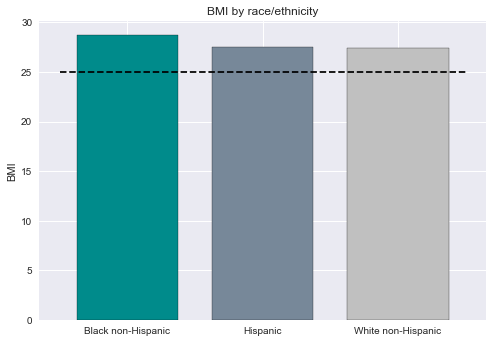

In [6]:
# BMI by race
bmi_race = df["bmi"].groupby(df["healask"]).mean().to_frame().reset_index()

colors = ["darkcyan", "lightslategray", "silver"]

fig, ax = plt.subplots()
plt.bar(range(3), bmi_race["bmi"], width = .75,
       edgecolor = "black", color = colors)
plt.ylabel("BMI")
plt.title("BMI by race/ethnicity")
ax.plot([-.5,2.5], [25,25], "k--")
plt.xticks(np.arange(3), bmi_race["healask"].unique())
plt.show()

In [7]:
# Percent with each chronic disease - data
disease = df[["healask","diabetes", "hi_BP", "hi_chol",
           "lung_prob", "heart_disease", "cancer", "obese"]]
disease.replace({"No": 0, "Yes": 1, "Refused": 0,
               "Don't know": 0}, inplace = True)

# Add column of ns of each race
disease_race = disease.groupby(disease["healask"]).sum()
disease_race = disease_race.merge(race,left_index=True,
                               right_index=True)
disease_race.rename(columns = {"healask": "n"}, inplace = True)

# Create df with percentages having each disease
disease_race_per = disease_race[["diabetes", "hi_BP", "hi_chol",
           "lung_prob", "heart_disease", "obese"]].div(disease_race.n, axis = 0)
disease_race_per = round(disease_race_per*100,2)
disease_race_per = disease_race_per.transpose().reset_index()
disease_race_per

disease_race_per

C:\Users\Cynthia\Anaconda3\lib\site-packages\pandas\core\generic.py:3725: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


,index,Black non-Hispanic,Hispanic,White non-Hispanic
0,diabetes,24.13,10.33,20.00
1,hi_BP,44.76,23.33,39.23
2,hi_chol,26.22,23.67,35.00
3,lung_prob,17.48,13.67,14.23
4,heart_disease,8.39,8.33,10.77
5,obese,31.82,21.00,23.46


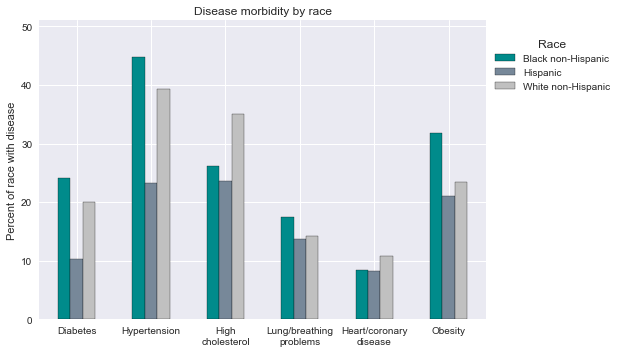

In [8]:
# Percent with each chronic disease - plot
diseases = ["Diabetes", "Hypertension", "High\ncholesterol",
           "Lung/breathing\nproblems", "Heart/coronary\ndisease", "Obesity"]
ax = disease_race_per.plot(kind = "bar", color = colors, 
                         ylim = [0,51], edgecolor = "black")
plt.ylabel("Percent of race with disease")
plt.xticks(np.arange(6), diseases, rotation = 0)
ax.legend(loc='center left', bbox_to_anchor=(1,.85),
         title = "Race")
plt.title("Disease morbidity by race")
plt.show()

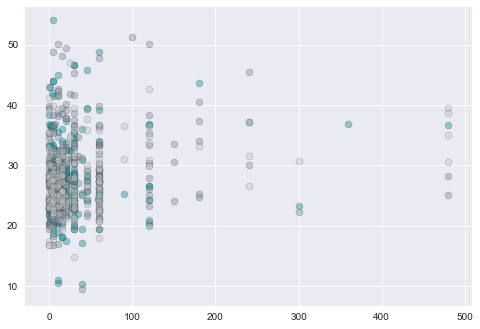

In [9]:
# Time takes to walk to park
df["walk_park"] = df["heal10min"].fillna(0) + 60*df["heal10hr"].fillna(0)
walk_bmi_df = df[["healask", "walk_park", "bmi"]]

for i, race in enumerate(races):
    walk_bmi_race_df = walk_bmi_df[walk_bmi_df["healask"] == race]
    plt.scatter(walk_bmi_race_df["walk_park"], walk_bmi_race_df["bmi"],
               color = colors[i], label = race, alpha = .4, edgecolor = "black")
plt.show()